In [5]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
import matplotlib as maplotlib
 
%matplotlib inline
 
plt.rcParams['figure.figsize']=(15,5)

In [6]:
# Load and preview dataset

raw_df = pd.read_csv('../Resources/CrudeOilPrices_2000-2020.csv', index_col='Date', parse_dates=True)
raw_df

,"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"
Date,
2000-01-04,25.56
2000-02-01,28.28
2000-03-01,31.71
2000-04-03,26.28
2000-05-02,26.86
...,...
2020-08-03,43.76
2020-09-01,45.72
2020-10-01,39.75


In [7]:
# Rename price column

crude_oil_df = raw_df.rename(columns={'Cushing, OK WTI Spot Price FOB (Dollars per Barrel)': 'USD_Barrel'})
crude_oil_df

,USD_Barrel
Date,
2000-01-04,25.56
2000-02-01,28.28
2000-03-01,31.71
2000-04-03,26.28
2000-05-02,26.86
...,...
2020-08-03,43.76
2020-09-01,45.72
2020-10-01,39.75


In [8]:
# Prepare for Prophet
# Reset index

df = crude_oil_df.reset_index()
df.head()

,Date,USD_Barrel
0,2000-01-04,25.56
1,2000-02-01,28.28
2,2000-03-01,31.71
3,2000-04-03,26.28
4,2000-05-02,26.86


In [9]:
# Rename 'Date' and 'USD/Barrel' to 'ds' and 'y', respectively

df = df.rename(columns={'Date':'ds', 'USD_Barrel':'y'})
df.head()

,ds,y
0,2000-01-04,25.56
1,2000-02-01,28.28
2,2000-03-01,31.71
3,2000-04-03,26.28
4,2000-05-02,26.86


<AxesSubplot:xlabel='ds'>

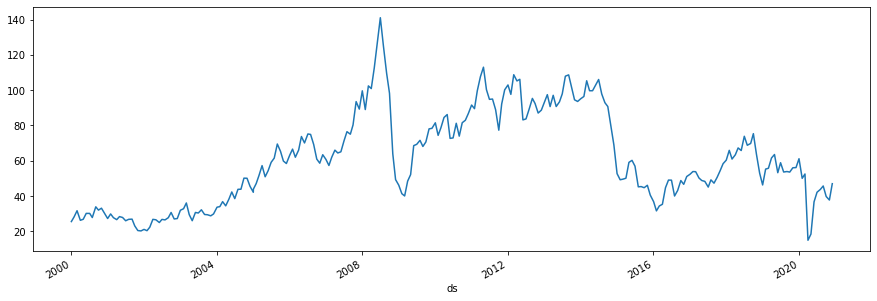

In [10]:
# Set index and preview plot

df.set_index('ds').y.plot()

In [11]:
# Determine if a trend exist via log-transform

df['y'] = np.log(df['y'])
df.tail()

,ds,y
247,2020-08-03,3.778720
248,2020-09-01,3.822536
249,2020-10-01,3.682610
250,2020-11-02,3.631780
251,2020-12-01,3.850786


<AxesSubplot:xlabel='ds'>

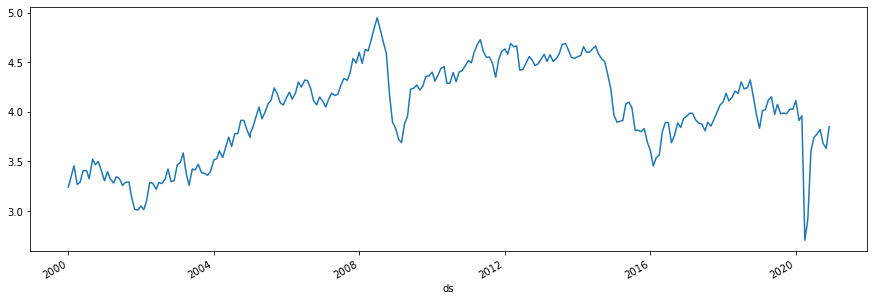

In [12]:
# Set 'ds' as index

df.set_index('ds').y.plot()

In [13]:
# Create model

model = Prophet(weekly_seasonality=True, daily_seasonality=True)
model.fit(df);

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [14]:
# Add future dates to model (5 years / 60 months)

future = model.make_future_dataframe(periods=60, freq = 'm')
future.tail()

,ds
307,2025-07-31
308,2025-08-31
309,2025-09-30
310,2025-10-31
311,2025-11-30


In [15]:
# Forecast and run through Prophet model

forecast = model.predict(future)
forecast.tail()

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
307,2025-07-31,3.418733,3.187111,3.811666,3.288985,3.562722,0.077290,0.077290,0.077290,-0.091921,...,0.033361,0.033361,0.033361,0.135849,0.135849,0.135849,0.0,0.0,0.0,3.496023
308,2025-08-31,3.411370,2.864724,3.494627,3.279487,3.559325,-0.244010,-0.244010,-0.244010,-0.091921,...,0.011490,0.011490,0.011490,-0.163579,-0.163579,-0.163579,0.0,0.0,0.0,3.167360
309,2025-09-30,3.404245,3.041518,3.707267,3.269129,3.553852,-0.039249,-0.039249,-0.039249,-0.091921,...,0.054134,0.054134,0.054134,-0.001462,-0.001462,-0.001462,0.0,0.0,0.0,3.364996
310,2025-10-31,3.396882,2.993498,3.673503,3.258953,3.551132,-0.057490,-0.057490,-0.057490,-0.091921,...,-0.040550,-0.040550,-0.040550,0.074981,0.074981,0.074981,0.0,0.0,0.0,3.339392
311,2025-11-30,3.389757,2.844502,3.508087,3.248552,3.548579,-0.227685,-0.227685,-0.227685,-0.091921,...,0.011490,0.011490,0.011490,-0.147254,-0.147254,-0.147254,0.0,0.0,0.0,3.162072


In [16]:
# Drop surplus columns

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
307,2025-07-31,3.496023,3.187111,3.811666
308,2025-08-31,3.167360,2.864724,3.494627
309,2025-09-30,3.364996,3.041518,3.707267
310,2025-10-31,3.339392,2.993498,3.673503
311,2025-11-30,3.162072,2.844502,3.508087


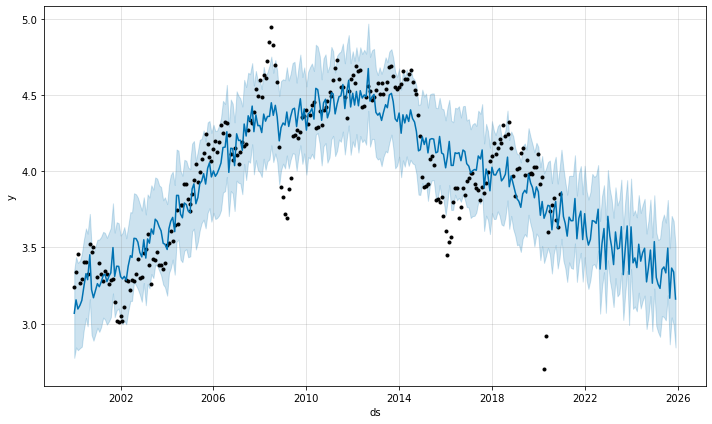

In [17]:
# Plot forecast

model.plot(forecast);

In [18]:
# Finalise visualisation
# Set 'ds' as index for both dataframes

df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)

In [19]:
# Combine both dataframes

vis_df = crude_oil_df.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
vis_df.head()

,USD_Barrel,yhat,yhat_lower,yhat_upper
2000-01-04,25.56,3.068755,2.776264,3.352576
2000-02-01,28.28,3.156658,2.844447,3.436213
2000-03-01,31.71,3.096545,2.826251,3.398816
2000-04-03,26.28,3.121495,2.839995,3.413989
2000-05-02,26.86,3.152998,2.849546,3.456457


In [20]:
# Rescale columns to get same scale

vis_df['yhat_rescaled'] = np.exp(vis_df['yhat'])
vis_df.head()

,USD_Barrel,yhat,yhat_lower,yhat_upper,yhat_rescaled
2000-01-04,25.56,3.068755,2.776264,3.352576,21.515104
2000-02-01,28.28,3.156658,2.844447,3.436213,23.491961
2000-03-01,31.71,3.096545,2.826251,3.398816,22.121395
2000-04-03,26.28,3.121495,2.839995,3.413989,22.680260
2000-05-02,26.86,3.152998,2.849546,3.456457,23.406127


<AxesSubplot:>

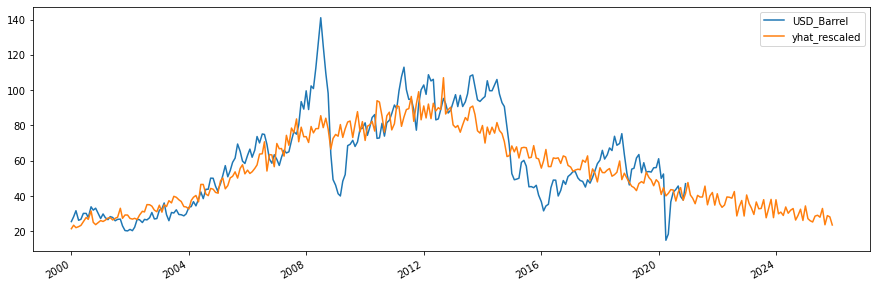

In [21]:
# Plot 'USD_Barrel' and 'yhat_rescaled'

vis_df[['USD_Barrel', 'yhat_rescaled']].plot()

In [22]:
# Ensure crude_oil and model data are connected

crude_oil_df.index = pd.to_datetime(crude_oil_df.index) #make sure our index as a datetime object
connect_date = crude_oil_df.index[-2] #select the 2nd to last date

In [23]:
# Mask forecast data

mask = (forecast.index > connect_date)
predict_df = forecast.loc[mask]

In [24]:
# Preview prediction

predict_df.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2020-12-01,3.823213,3.433859,4.013611,3.823213,3.823213,-0.099687,-0.099687,-0.099687,-0.091921,-0.091921,...,0.054134,0.054134,0.054134,-0.061900,-0.061900,-0.061900,0.0,0.0,0.0,3.723526
2020-12-31,3.816088,3.557014,4.141313,3.816088,3.816088,0.048728,0.048728,0.048728,-0.091921,-0.091921,...,0.033361,0.033361,0.033361,0.107287,0.107287,0.107287,0.0,0.0,0.0,3.864815
2021-01-31,3.808725,3.412880,4.019655,3.808725,3.808725,-0.105744,-0.105744,-0.105744,-0.091921,-0.091921,...,0.011490,0.011490,0.011490,-0.025313,-0.025313,-0.025313,0.0,0.0,0.0,3.702981
2021-02-28,3.802075,3.366503,3.934356,3.801882,3.802128,-0.143680,-0.143680,-0.143680,-0.091921,-0.091921,...,0.011490,0.011490,0.011490,-0.063250,-0.063250,-0.063250,0.0,0.0,0.0,3.658394
2021-03-31,3.794712,3.274269,3.846397,3.793818,3.795243,-0.220266,-0.220266,-0.220266,-0.091921,-0.091921,...,-0.037144,-0.037144,-0.037144,-0.091201,-0.091201,-0.091201,0.0,0.0,0.0,3.574446


In [25]:
# Create updated dataframe

vis_df = crude_oil_df.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
vis_df['yhat_scaled']=np.exp(vis_df['yhat'])

In [26]:
# Preview head

vis_df.head()

,USD_Barrel,yhat,yhat_lower,yhat_upper,yhat_scaled
2000-01-04,25.56,NaN,NaN,NaN,NaN
2000-02-01,28.28,NaN,NaN,NaN,NaN
2000-03-01,31.71,NaN,NaN,NaN,NaN
2000-04-03,26.28,NaN,NaN,NaN,NaN
2000-05-02,26.86,NaN,NaN,NaN,NaN


In [27]:
# Preview tail

vis_df.tail()

,USD_Barrel,yhat,yhat_lower,yhat_upper,yhat_scaled
2025-07-31,NaN,3.496023,3.187111,3.811666,32.984006
2025-08-31,NaN,3.167360,2.864724,3.494627,23.744717
2025-09-30,NaN,3.364996,3.041518,3.707267,28.933386
2025-10-31,NaN,3.339392,2.993498,3.673503,28.201979
2025-11-30,NaN,3.162072,2.844502,3.508087,23.619488


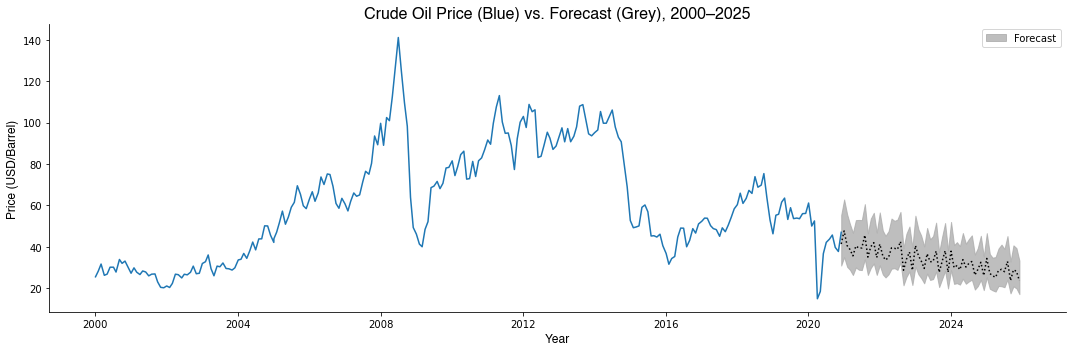

In [33]:
# Plot final visualisation

# Plot
fig, ax1 = plt.subplots()
ax1.plot(vis_df.USD_Barrel)
ax1.plot(vis_df.yhat_scaled, color='black', linestyle=':')

# Fill
ax1.fill_between(vis_df.index, np.exp(vis_df['yhat_upper']), np.exp(vis_df['yhat_lower']), alpha=0.75, 
                 color='darkgray', label = 'Forecast')

# Font families
font_1 = {'family':'helvetica','color':'black','size':16}
font_2 = {'family':'helvetica','color':'black','size':12}

# Labels
ax1.set_title('Crude Oil Price (Blue) vs. Forecast (Grey), 2000–2025', fontdict = font_1)
ax1.set_ylabel('Price (USD/Barrel)', fontdict = font_2)
ax1.set_xlabel('Year', fontdict = font_2)

# Legend
plt.legend(title='', loc='upper right', ncol=1)

# Aesthetics
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()

# Show/save
plt.savefig("/Users/minoperic/Data Analytics/Data Investigations/final-project/Images/crude_oil_price_forecast.png", 
            transparent=False, dpi=300)
plt.show()

In [31]:
# Save model
import json
from prophet.serialize import model_to_json, model_from_json

# Save
with open('./crude_oil_model.json', 'w') as fout:
    json.dump(model_to_json(model), fout)